<a href="https://colab.research.google.com/github/MilaRVM/Primer-Repo/blob/main/Copia_de_Copia_de_Copia_de_trabajofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DISCRIMINACIÓN.zip to DISCRIMINACIÓN.zip


In [ ]:
import zipfile
import os

In [ ]:
zip_path = "/content/DISCRIMINACIÓN.zip"

In [ ]:
extract_path = "/content/DISCRIMINACIÓN"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

In [ ]:
!pip install PyPDF2 scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
import os
import re
import pandas as pd
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() if page.extract_text() else ""
    return text

In [ ]:
pdf_texts = {}
for pdf_file in extracted_files:
    pdf_texts[pdf_file] = extract_text_from_pdf(pdf_file)


[0, IndirectObject(203, 0, 140700948387600)]
[0, IndirectObject(207, 0, 140700948387600)]
[0, IndirectObject(211, 0, 140700948387600)]
[0, IndirectObject(215, 0, 140700948387600)]
[0, IndirectObject(219, 0, 140700948387600)]
[0, IndirectObject(223, 0, 140700948387600)]
[0, IndirectObject(227, 0, 140700948387600)]
[0, IndirectObject(231, 0, 140700948387600)]
[0, IndirectObject(235, 0, 140700948387600)]
[0, IndirectObject(239, 0, 140700948387600)]
[0, IndirectObject(243, 0, 140700948387600)]
[0, IndirectObject(247, 0, 140700948387600)]
[0, IndirectObject(251, 0, 140700948387600)]
[0, IndirectObject(255, 0, 140700948387600)]
[0, IndirectObject(259, 0, 140700948387600)]
[0, IndirectObject(203, 0, 140700948387600)]
[0, IndirectObject(207, 0, 140700948387600)]
[0, IndirectObject(211, 0, 140700948387600)]
[0, IndirectObject(215, 0, 140700948387600)]
[0, IndirectObject(219, 0, 140700948387600)]
[0, IndirectObject(223, 0, 140700948387600)]
[0, IndirectObject(227, 0, 140700948387600)]
[0, Indire

In [ ]:
preview_texts = {k: v[:500] for k, v in pdf_texts.items()}  # Solo los primeros 500 caracteres
print(preview_texts)

{'/content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIMINACION6.pdf': ' \n \n \n \n \n \n1 \nM-CPC -05/01 \n \nINSTITUTO NACIONAL DE DEFENSA DE LA COMPETENCIA Y DE LA PROTECCIÓN DE LA PROPIEDAD INTELECTUAL  \nCalle De la Prosa 104, San Borja, Lima 41 - Perú Telf: 224 7800 / Fax: 224 0348  \nE-mail: postmaster@indecopi.gob.pe / Web: www.indecopi.gob.pe  \nCOMISIÓN DE PROTECCIÓN AL CONSUMIDOR N° 2  \nSEDE CENTRAL   \nEXPEDIENTE N° 698-2022 /CC2   \n \n \n \nRESOLUCIÓN FINAL N° 2382 -2022/CC2  \n \nDENUNCIANTE   : JULIO ERNESTO PERALTA TORRES  \n  (El SEÑOR PERALTA )  \nDENUNCIADO         ', '/content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIMINACIOnN.pdf': 'TRIBUNAL DE DEFENSA DE LA COMPETENCIA  \n Y DE LA PROPIEDAD INTELECTUAL  \n           Sala Especializada en Protección al Consumidor  \n \nRESOLUCIÓN 1848 -2023/SPC -INDECOPI  \n \nEXPEDIENTE 0879 -2020/CC2  \n \n \n \nM-SPC-13/1B     1/25 \n \n \nINSTITUTO NACIONAL DE DEFENSA DE LA COMPETENCIA Y DE LA PROTECCIÓN DE LA PROPIEDAD INTELECTUAL  \nCa

In [ ]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Eliminar espacios extra
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    return text

In [ ]:
cleaned_texts = {k: clean_text(v) for k, v in pdf_texts.items()}

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')

vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(cleaned_texts.values())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
spanish_stopwords = set(stopwords.words('spanish'))

In [ ]:
num_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)


In [ ]:
cluster_results = {file: cluster for file, cluster in zip(cleaned_texts.keys(), clusters)}


In [ ]:
df_clusters = pd.DataFrame(list(cluster_results.items()), columns=["Archivo", "Cluster"])


In [ ]:
print(df_clusters)

                                             Archivo  Cluster
0  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0
1  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3
2  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1
3  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        2
4  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3
5  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3
6  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3
7  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0
8  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0
9  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0


In [ ]:
df_clusters.to_csv("resultados_clustering.csv", index=False)

# Para descargarlo en Colab
from google.colab import files
files.download("resultados_clustering.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
categorias = {
    "Discriminación": ["discriminación", "exclusión", "derechos", "injusticia", "prejuicio"],
    "Mujer": ["mujer", "feminismo", "igualdad", "violencia", "brecha salarial"],
    "Género": ["género", "identidad", "LGBT", "transgénero", "diversidad"],
    "Sexualidad": ["sexualidad", "orientación", "LGBTQ", "homofobia", "heteronormatividad"],
    "Edad": ["edad", "vejez", "juventud", "ancianos", "discriminación etaria"],
    "Clase Social": ["clase social", "pobreza", "ricos", "desigualdad", "privilegio"],
    "Cuestiones Políticas": ["política", "ideología", "derecha", "izquierda", "autoritarismo"],
    "Cultura": ["cultura", "tradición", "costumbres", "multiculturalismo", "globalización"]
}

In [ ]:
num_clusters = 8

# Aplicar K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Asignar cada documento a su cluster temático
cluster_results = {file: cluster for file, cluster in zip(cleaned_texts.keys(), clusters)}
df_clusters = pd.DataFrame(list(cluster_results.items()), columns=["Archivo", "Cluster"])

# Mostrar resultados
print(df_clusters)

                                             Archivo  Cluster
0  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1
1  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1
2  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        4
3  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        2
4  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        7
5  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1
6  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        5
7  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3
8  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0
9  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        6


In [ ]:
cluster_keywords = {i: [] for i in range(num_clusters)}

for i, doc in enumerate(cleaned_texts.values()):
    cluster_num = clusters[i]
    for category, keywords in categorias.items():
        if any(word in doc for word in keywords):
            cluster_keywords[cluster_num].append(category)

# Asignar nombres de clusters basados en categorías dominantes
cluster_names = {k: max(set(v), key=v.count) if v else "Desconocido" for k, v in cluster_keywords.items()}
df_clusters["Categoría"] = df_clusters["Cluster"].map(cluster_names)

# Mostrar la tabla con categorías asignadas
print(df_clusters)

                                             Archivo  Cluster Categoría
0  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1      Edad
1  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1      Edad
2  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        4    Género
3  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        2    Género
4  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        7    Género
5  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        1      Edad
6  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        5    Género
7  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        3    Género
8  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        0    Género
9  /content/DISCRIMINACIÓN/DISCRIMINACIαN/DISCRIM...        6    Género


In [ ]:
df_clusters.to_csv("resultados_clustering_tematico.csv", index=False)

# Descargar archivo CSV
from google.colab import files
files.download("resultados_clustering_tematico.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DISCRIMINACIÓN.zip to DISCRIMINACIÓN (1).zip


In [ ]:
import zipfile
import os

In [ ]:
zip_path = "/content/DISCRIMINACIÓN.zip"  # Asegúrate de cambiar el nombre si es diferente
extract_path = "/content/DISCRIMINACIÓN(1)"

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
extracted_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        extracted_files.append(os.path.join(root, file))

In [ ]:
print("Archivos extraídos:", extracted_files)

Archivos extraídos: ['/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION6.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACIOnN.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION1.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION4.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION5.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION 7.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION3.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION2.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION8.pdf', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION9.pdf']


In [ ]:
!pip install PyPDF2 scikit-learn pandas matplotlib

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() if page.extract_text() else ""
    return text

In [ ]:
pdf_texts = {}
for pdf_file in extracted_files:
    pdf_texts[pdf_file] = extract_text_from_pdf(pdf_file)


[0, IndirectObject(203, 0, 140700955776720)]
[0, IndirectObject(207, 0, 140700955776720)]
[0, IndirectObject(211, 0, 140700955776720)]
[0, IndirectObject(215, 0, 140700955776720)]
[0, IndirectObject(219, 0, 140700955776720)]
[0, IndirectObject(223, 0, 140700955776720)]
[0, IndirectObject(227, 0, 140700955776720)]
[0, IndirectObject(231, 0, 140700955776720)]
[0, IndirectObject(235, 0, 140700955776720)]
[0, IndirectObject(239, 0, 140700955776720)]
[0, IndirectObject(243, 0, 140700955776720)]
[0, IndirectObject(247, 0, 140700955776720)]
[0, IndirectObject(251, 0, 140700955776720)]
[0, IndirectObject(255, 0, 140700955776720)]
[0, IndirectObject(259, 0, 140700955776720)]
[0, IndirectObject(203, 0, 140700955776720)]
[0, IndirectObject(207, 0, 140700955776720)]
[0, IndirectObject(211, 0, 140700955776720)]
[0, IndirectObject(215, 0, 140700955776720)]
[0, IndirectObject(219, 0, 140700955776720)]
[0, IndirectObject(223, 0, 140700955776720)]
[0, IndirectObject(227, 0, 140700955776720)]
[0, Indire

In [ ]:
preview_texts = {k: v[:500] for k, v in pdf_texts.items()}  # Solo los primeros 500 caracteres
print(preview_texts)

{'/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACION6.pdf': ' \n \n \n \n \n \n1 \nM-CPC -05/01 \n \nINSTITUTO NACIONAL DE DEFENSA DE LA COMPETENCIA Y DE LA PROTECCIÓN DE LA PROPIEDAD INTELECTUAL  \nCalle De la Prosa 104, San Borja, Lima 41 - Perú Telf: 224 7800 / Fax: 224 0348  \nE-mail: postmaster@indecopi.gob.pe / Web: www.indecopi.gob.pe  \nCOMISIÓN DE PROTECCIÓN AL CONSUMIDOR N° 2  \nSEDE CENTRAL   \nEXPEDIENTE N° 698-2022 /CC2   \n \n \n \nRESOLUCIÓN FINAL N° 2382 -2022/CC2  \n \nDENUNCIANTE   : JULIO ERNESTO PERALTA TORRES  \n  (El SEÑOR PERALTA )  \nDENUNCIADO         ', '/content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISCRIMINACIOnN.pdf': 'TRIBUNAL DE DEFENSA DE LA COMPETENCIA  \n Y DE LA PROPIEDAD INTELECTUAL  \n           Sala Especializada en Protección al Consumidor  \n \nRESOLUCIÓN 1848 -2023/SPC -INDECOPI  \n \nEXPEDIENTE 0879 -2020/CC2  \n \n \n \nM-SPC-13/1B     1/25 \n \n \nINSTITUTO NACIONAL DE DEFENSA DE LA COMPETENCIA Y DE LA PROTECCIÓN DE LA PROPIEDAD INTELECTUAL

In [ ]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Eliminar espacios extra
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    return text

In [ ]:
cleaned_texts = {k: clean_text(v) for k, v in pdf_texts.items()}

In [ ]:
custom_stopwords = set([
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con",
    "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "fue", "este",
    "ha", "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "ser", "tiene", "también"
])

In [ ]:
vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
X = vectorizer.fit_transform(cleaned_texts.values())

InvalidParameterError: The 'stop_words' parameter of TfidfVectorizer must be a str among {'english'}, an instance of 'list' or None. Got {'entre', 'para', 'es', 'ha', 'sí', 'por', 'con', 'los', 'o', 'también', 'las', 'el', 'fue', 'como', 'en', 'sus', 'ser', 'del', 'tiene', 'le', 'más', 'una', 'este', 'que', 'muy', 'porque', 'esta', 'lo', 'de', 'a', 'la', 'ya', 'su', 'al', 'cuando', 'se', 'y', 'pero', 'sobre', 'sin', 'un', 'no'} instead.

In [ ]:
custom_stopwords = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con",
    "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya", "o", "fue", "este",
    "ha", "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "ser", "tiene", "también"
]

vectorizer = TfidfVectorizer(stop_words=custom_stopwords)  # Now using a list for stop_words
X = vectorizer.fit_transform(cleaned_texts.values())

In [ ]:
num_clusters = 8

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

In [ ]:
cluster_results = {file: cluster for file, cluster in zip(cleaned_texts.keys(), clusters)}

# Convertir a DataFrame
df_clusters = pd.DataFrame(list(cluster_results.items()), columns=["Archivo", "Cluster"])

In [ ]:
categorias = {
    0: "Discriminación",
    1: "Mujer",
    2: "Género",
    3: "Sexualidad",
    4: "Edad",
    5: "Clase Social",
    6: "Cuestiones Políticas",
    7: "Cultura"
}

In [ ]:
df_clusters["Categoría"] = df_clusters["Cluster"].map(categorias)
df_clusters["Categoría"] = df_clusters["Cluster"].map(categorias)

# Mostrar los resultados
print(df_clusters)

                                             Archivo  Cluster  \
0  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        1   
1  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        1   
2  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        4   
3  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        2   
4  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        7   
5  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        1   
6  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        5   
7  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        3   
8  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        0   
9  /content/DISCRIMINACIÓN(1)/DISCRIMINACIαN/DISC...        6   

              Categoría  
0                 Mujer  
1                 Mujer  
2                  Edad  
3                Género  
4               Cultura  
5                 Mujer  
6          Clase Social  
7            Sexualidad  
8        Discriminación  
9  Cuestiones Políticas 

In [ ]:
df_clusters.to_csv("resultados_clustering.csv", index=False)

# Para descargarlo en Colab
from google.colab import files
files.download("resultados_clustering.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

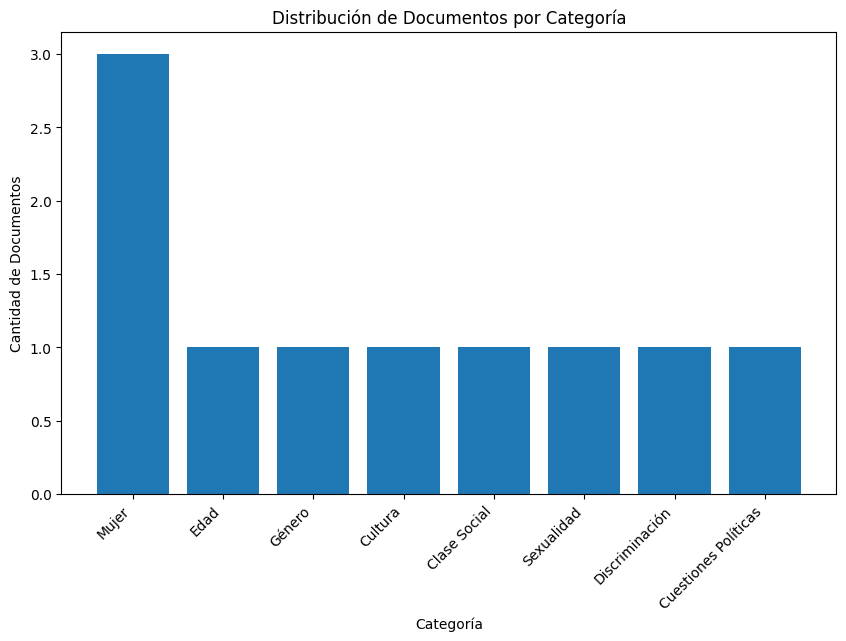

In [ ]:
category_counts = df_clusters["Categoría"].value_counts()

# Crear un gráfico de barras para visualizar la distribución de documentos por categoría
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Documentos")
plt.title("Distribución de Documentos por Categoría")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
!pip install PyPDF2 scikit-learn pandas matplotlib

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

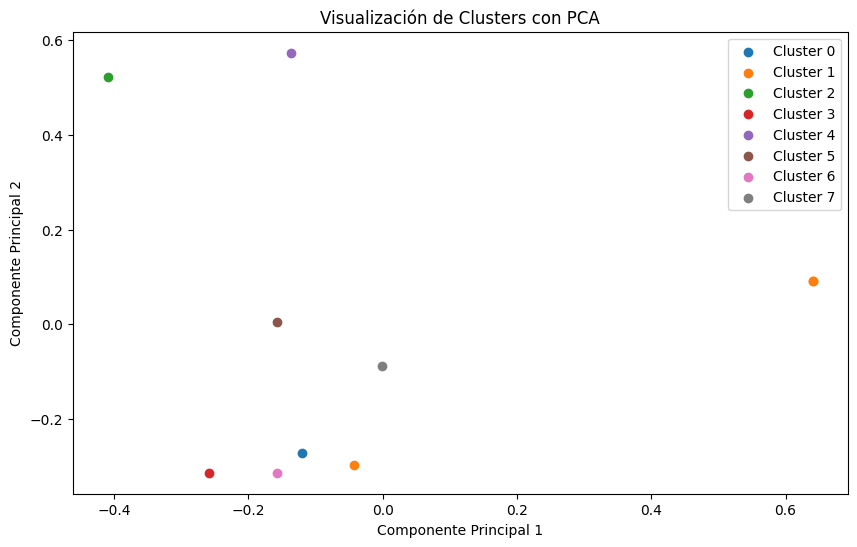

In [ ]:
plt.figure(figsize=(10, 6))

for cluster in range(num_clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f"Cluster {cluster}")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Clusters con PCA")
plt.legend()
plt.show()

In [ ]:
inertia = []
k_values = range(1, 11)  # Probamos de 1 a 10 clusters

for k in k_values:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X)
    inertia.append(kmeans_test.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


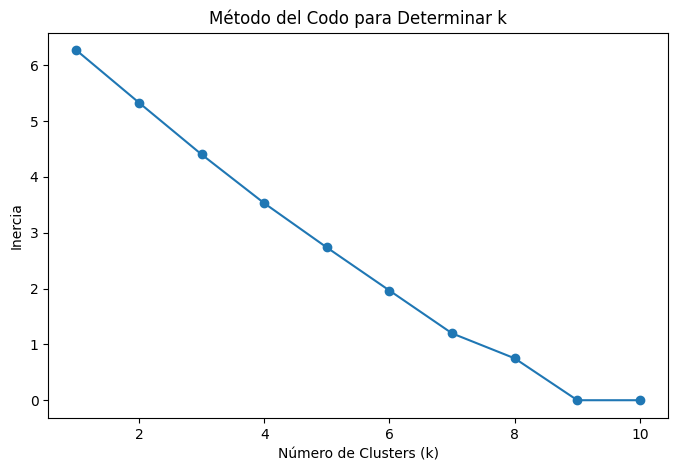

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="-")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Determinar k")
plt.show()

In [ ]:
category_counts = df_clusters["Categoría"].value_counts(normalize=True) * 100

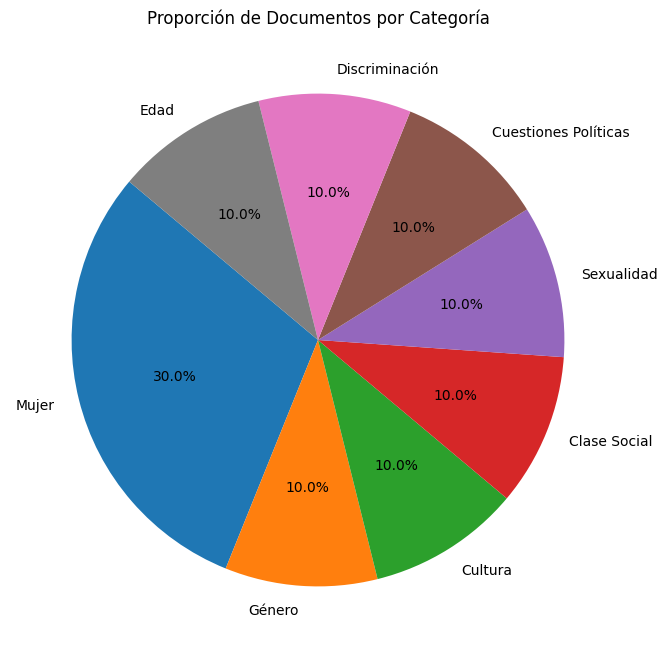

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de Documentos por Categoría")
plt.show()